### Задания

#### Задание 1
У вас есть сайт, на котором посетители могут совершать покупки.

Обычная конверсия в покупку на потоке клиентов составляет 11%. Начиная с февраля конверсия уменьшилась до 9%, причем вывод сделан по 1400 наблюдениям.

**Найдите p-value, характеризующее статзначимость гипотезы о том, что с февраля конверсия действительно упала.**

(Подсказка: тут нет никакого А-Б теста, мы просто сравниваем новую ситуацию со старой)

#### Решение

In [2]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

c = 0.11  # Обычная конверсия в покупку на потоке
c_f = 0.09  # конверсия в покупку начиная с февраля
n = 1400  # количество наблюдений

conversions = np.array([c_f * n, c * n])
clicks = np.array([n, n])

zscore, pvalue = proportions_ztest(conversions, clicks, alternative = 'smaller')
print('zscore = {:.4f}, pvalue = {:.4f}'.format(zscore, pvalue))

zscore = -1.7638, pvalue = 0.0389


#### Задание 2
У вас тот же сайт, на котором вы решили провести АБ-тест.

Взяли выборку, поделили примерно пополам. На тестовой группе предлагаем клиенту скидку в 20%. Гипотеза заключается в том, что скидка увеличивает конверсию в продажу.

Результаты получились следующими:

Контроль: из 16500 наблюдений 1599 покупок

Тест: из 15903 наблюдений 1580 покупок

Мы уверены, что конверсия на тесте должна быть не хуже контроля и ожидаем уровень значимости alpha=0.05

**Статзначимый ли результат теста?**

#### Решение

In [25]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

alpha = 0.05  # уровень значимости

test_orders = 1580  # тест количество покупок
control_orders = 1599  # контроль количество покупок
test_n = 15903 # тест количество наблюдений
control_n = 16500  # контроль количество наблюдений

conversions = np.array([test_orders, control_orders])
clicks = np.array([test_n, control_n])

zscore, pvalue = proportions_ztest(conversions, clicks, alternative = 'larger')
print('zscore = {:.4f}, pvalue = {:.4f}'.format(zscore, pvalue))

if pvalue <= 0.05:
    print('Результат теста cтатзначимый')
else:
    print('Не удалось отвергнуть нулевую гипотезу о равенстве результатов и получить статзначимый результат.')

zscore = 0.7391, pvalue = 0.2299
Не удалось отвергнуть нулевую гипотезу о равенстве результатов и получить статзначимый результат.


#### Задание 3
Тот же сайт, но теперь тестируем следующее:
* в группе B (тест) предлагаем покупателям дополнительно добавить в корзину еще один товар по скидке
* контрольной группе А ничего не предлагаем.

Результаты теста лежат в приложенном файле. В первой колонке флаг тестовой группы, во второй - сумма всех покупок посетителя.

**Требуется определить, есть ли статзначимое различие в распределениях на тесте и контроле с уровнем значимости alpha=0.05**

#### Решение

In [102]:
# импорт библиотек
import pandas as pd
from scipy import stats as st

In [103]:
# чтение данных из файла
df = pd.read_excel('task4_data.xlsx', header=0)

In [104]:
# переименование колонок для удобства дальнейшей работы
df.rename(columns=({'Группа': 'group', 'Значение': 'val'}), inplace=True)

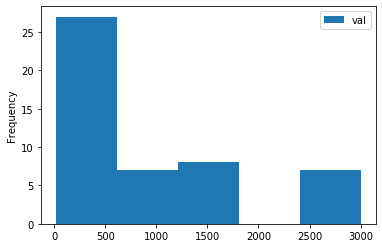

In [105]:
# посмотрим графически на распределение значений
df[df['group'] == 'А'].plot(kind='hist', bins=5);

In [106]:
# проверим с помощью теста Шапиро-Уилка нормальность распределения выборки.
res = st.shapiro(df[df['group'] == 'А'].val)

if res[1] > 0.05:
    print('Распределение нормальное.')
else:
    print('Распределение не является нормальным. Используем непараметрический аналог U-критерий Манна-Уитни.')

Распределение не является нормальным. Используем непараметрический аналог U-критерий Манна-Уитни.


In [108]:
alpha = 0.05  # уровень значимости

# сравниваем выборки с помощью U-критерия Манна-Уитни
stat, pval = st.mannwhitneyu(df[df['group'] == 'А'].val, df[df['group'] == 'B'].val, alternative='two-sided')

# результат (вывод)
if pval <= 0.05:
    print('Удалось достичь статзначимого различия.\nПредложение добавить в корзину еще один товар по скидке увеличивает средний чек.')
else:
    print('Статзначимого различия достичь не удалось.\nПредложение добавить в корзину еще один товар по скидке значимо не увеличивает средний чек.')

Статзначимого различия достичь не удалось.
Предложение добавить в корзину еще один товар по скидке значимо не увеличивает средний чек.
